# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Analysis for the core random dataset and plots, for rectangular matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [2]:
DatasetFolder = 'Core_Rectangular_Impact'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [3]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

dfSum['MNRatio'] = dfSum['InputM'].div(dfSum['InputN'])

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [4]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [5]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters,MNRatio
0,rnd_1_1_1,256,256,256,16,0.895123,0.895307,0.000185,0.010664,2.286656,-2.275992,154,1,1,1,0.014848,-0.004184,0.0,1.0
1,rnd_1_2_1,256,256,256,16,0.918000,0.918080,0.000080,0.011017,1.951293,-1.940275,145,1,2,1,0.013457,-0.002440,0.0,1.0
2,rnd_1_3_1,256,256,256,16,0.900193,0.900235,0.000043,0.013954,1.999704,-1.985750,150,1,3,1,0.013331,0.000622,1.0,1.0
3,rnd_2_1_1,512,128,128,16,0.831211,0.831238,0.000027,0.009940,4.434815,-4.424875,130,2,1,1,0.034114,-0.024173,0.0,4.0
4,rnd_2_2_1,512,128,128,16,0.806558,0.806647,0.000088,0.005414,6.000080,-5.994666,172,2,2,1,0.034884,-0.029470,0.0,4.0
5,rnd_2_3_1,512,128,128,16,0.821861,0.821882,0.000021,0.007415,4.577537,-4.570122,135,2,3,1,0.033908,-0.026493,0.0,4.0
6,rnd_3_1_1,1024,64,64,16,0.680779,0.680806,0.000027,0.039584,29.542643,-29.503059,235,3,1,1,0.125713,-0.086130,0.0,16.0
7,rnd_3_2_1,1024,64,64,16,0.600029,0.600031,0.000003,0.033530,11.077321,-11.043792,86,3,2,1,0.128806,-0.095276,0.0,16.0
8,rnd_3_3_1,1024,64,64,16,0.643896,0.643910,0.000015,0.033494,20.179618,-20.146124,157,3,3,1,0.128533,-0.095039,0.0,16.0
9,rnd_4_1_1,2048,32,32,16,0.345059,0.345065,0.000006,0.131017,56.639333,-56.508316,113,4,1,1,0.501233,-0.370217,0.0,64.0


### Plots

In [6]:
dfGrouped = dfSum[['InputM', 'InputN', 'MNRatio', 'TargetRk', 'Svd_time', 'Our_time', 'TimeIter']].groupby(['MNRatio']).mean()

dfGrouped

,InputM,InputN,TargetRk,Svd_time,Our_time,TimeIter
MNRatio,,,,,,
1.0,256,256,16,0.011878,2.079218,0.013879
4.0,512,128,16,0.007590,5.004144,0.034302
16.0,1024,64,16,0.035536,20.266527,0.127684
64.0,2048,32,16,0.134167,53.854363,0.520801


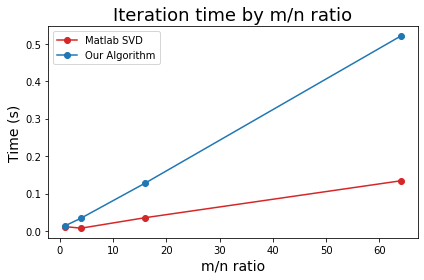

In [16]:
plt.yscale('linear')
plt.xscale('linear')

xax = dfGrouped.index.get_level_values(0)
yax = dfGrouped.TimeIter
yaxSVD = dfGrouped.Svd_time



plt.plot(xax, yaxSVD, color='tab:red', label='Matlab SVD', marker='o')
plt.plot(xax, yax, color='tab:blue', label='Our Algorithm', marker='o')

plt.legend(loc='best')
plt.title(r'Iteration time by m/n ratio', fontsize=18)
plt.xlabel("m/n ratio", fontsize=14)
plt.ylabel(r'Time (s)', fontsize=14)
plt.tight_layout()
plt.savefig('core_comparison_rectangular.png', format='png', dpi=300)
plt.show()